### Dart Detection
###### This is an exercise in using OpenCV 3.2 and python3 to detect darts thrown on a dart board using image processing

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.2.0-dev 


In [2]:
ls samples

AAEO2187.MOV  IMG_3674.JPG  PKMN6853.MOV  TSLW0958.MOV
IMG_3656.JPG  LGZT7865.MOV  RXVX4887.MOV  WNZE0063.MOV


In [16]:
PATH = r'samples/IMG_3656.JPG'
image = cv2.imread(PATH,cv2.IMREAD_COLOR)

Now matplotlib expects images as RGB, while OpenCV reads them as BGR. 
As a results we are switchingn the channels and render the images as a test.

In [ ]:
b,g,r = cv2.split(image)
image2 = cv2.merge([r,g,b])

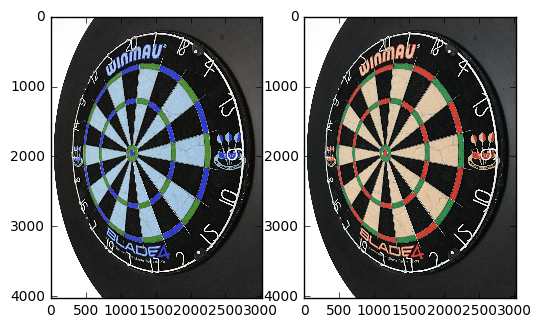

In [23]:
plt.subplot(121);plt.imshow(image)
plt.subplot(122);plt.imshow(image2)
plt.show()

Now let's define a function that takes care of the plotting with conversion if required for us - and also plot a bit bigger.

In [24]:
def convertToRgb(im):
    return cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

def plot(im, convert=False):
    fig, ax = plt.subplots(figsize=(18, 25))
    if convert:
        ax.imshow(convertToRgb(im))
    else:
        ax.imshow(im)

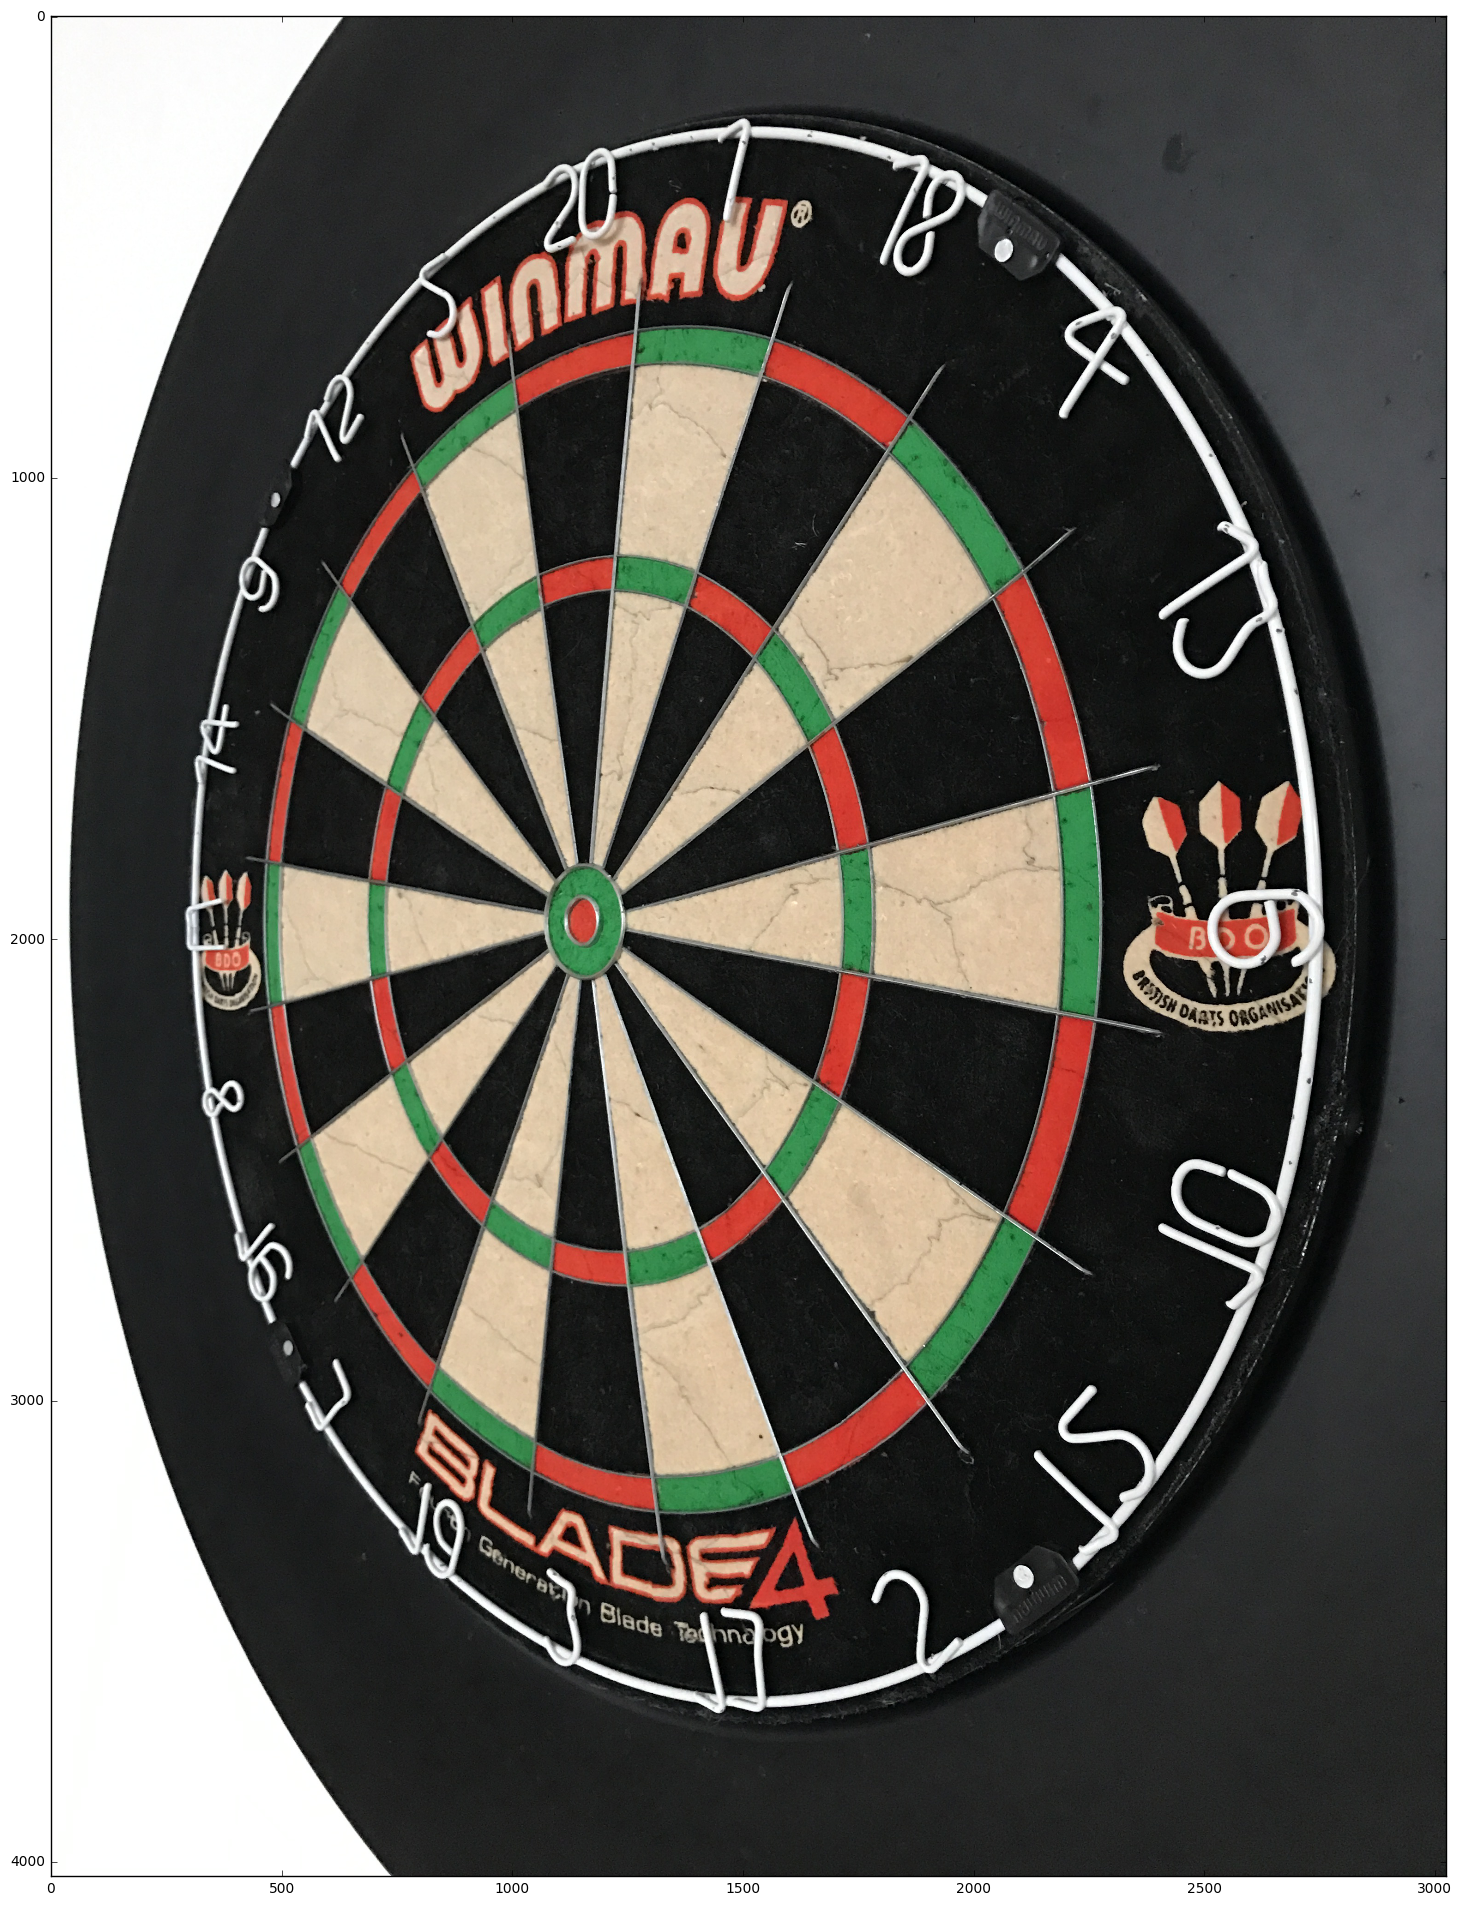

In [27]:
plot(image, 1)

Now let's load a 4K video and get a frame from it so we have our first arrow - and take another frame for background subtraction.

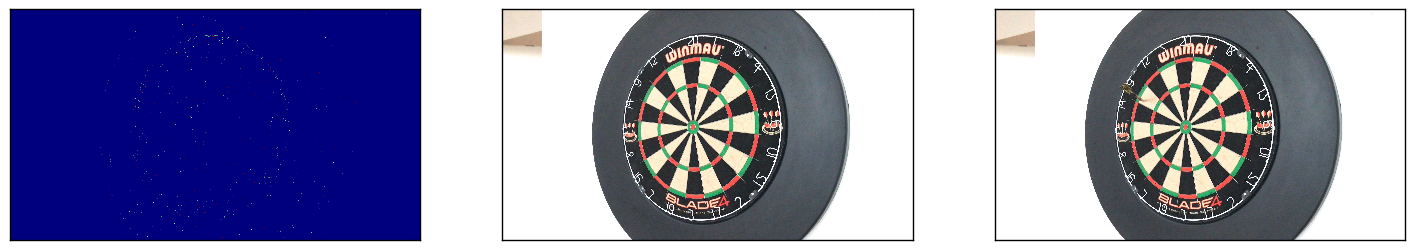

In [64]:
cap = cv2.VideoCapture('samples/AAEO2187.MOV')
i=0
fgbg = cv2.createBackgroundSubtractorMOG2()

while(i<20):
    ret, frame = cap.read()
    fgmask = fgbg.apply(frame)
    if(i==1): background = frame.copy()
    i=i+1

cap.release()

plt.subplots(figsize=(18,25))
plt.subplot(131);plt.xticks([]);plt.yticks([]);plt.imshow(fgmask)
plt.subplot(132);plt.xticks([]);plt.yticks([]);plt.imshow(convertToRgb(background))
plt.subplot(133);plt.xticks([]);plt.yticks([]);plt.imshow(convertToRgb(frame))
plt.show()